In [1]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.io import wavfile
import math
import json

### Dataset downloaded from link
https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification

In [5]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/kaggle"

In [6]:
%cd kaggle

/content/kaggle


In [7]:
!kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification

 99% 1.20G/1.21G [00:05<00:00, 238MB/s]
100% 1.21G/1.21G [00:05<00:00, 240MB/s]


In [8]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  gtzan-dataset-music-genre-classification.zip
  inflating: Data/features_30_sec.csv  
  inflating: Data/features_3_sec.csv  
  inflating: Data/genres_original/blues/blues.00000.wav  
  inflating: Data/genres_original/blues/blues.00001.wav  
  inflating: Data/genres_original/blues/blues.00002.wav  
  inflating: Data/genres_original/blues/blues.00003.wav  
  inflating: Data/genres_original/blues/blues.00004.wav  
  inflating: Data/genres_original/blues/blues.00005.wav  
  inflating: Data/genres_original/blues/blues.00006.wav  
  inflating: Data/genres_original/blues/blues.00007.wav  
  inflating: Data/genres_original/blues/blues.00008.wav  
  inflating: Data/genres_original/blues/blues.00009.wav  
  inflating: Data/genres_original/blues/blues.00010.wav  
  inflating: Data/genres_original/blues/blues.00011.wav  
  inflating: Data/genres_original/blues/blues.00012.wav  
  inflating: Data/genres_original/blues/blues.00013.wav  
  inflating: Data/genres_original/blues/blues.00014.wa

#### We need transfom data into mfcc so we will load every song and then convert it into mfcc features and then use this data further
**Audio Preprocessing**

In [11]:
DATASET_PATH = '/content/kaggle/Data/genres_original'
JSON_PATH = '/content/kaggle/Data/data.json'
SAMPLE_RATE = 16000
TRACK_DURATION = 30 # seconds
SAMPLES_PER_TRACK = SAMPLE_RATE*TRACK_DURATION

def save_mfcc(dataset_path, json_path, num_mfcc = 13, n_fft = 2048, hop_length = 512, num_segments = 5) :
  """Extracts MFCCs from music dataset and saves them into a json file along witgh genre labels.
        :param dataset_path (str): Path to dataset
        :param json_path (str): Path to json file used to save MFCCs
        :param num_mfcc (int): Number of coefficients to extract
        :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
        :param hop_length (int): Sliding window for FFT. Measured in # of samples
        :param: num_segments (int): Number of segments we want to divide sample tracks into
        :return:
  """

  # dict to store mapping, mfcc's, labels
  data = {
      'mapping' : [],
      'mfcc' : [],
      'labels' : []
  }

  samples_per_segment = SAMPLES_PER_TRACK//num_segments
  num_mfcc_vectors_per_segment = math.ceil(samples_per_segment/hop_length)

  # walking through all folders and subfolders
  for i, (root, dirs, files) in enumerate(os.walk(dataset_path)):
    if root is not dataset_path :

      # save world label
      semantic_label = root.split('/')[-1]
      data['mapping'].append(semantic_label)
      print("\nProcessing: {}".format(semantic_label))

      # process all audio files in the folder
      for f in files :
        file_path = os.path.join(root, f)
        samples, sr = librosa.load(file_path, sr = SAMPLE_RATE)

        # process all segments of audio_file it is done for long audio clips to create large dataset
        for d in range(num_segments):
          # calculate start and finish segments of samples
          start = samples_per_segment*d
          end = start + samples_per_segment

          #extract mfcc
          mfcc = librosa.feature.mfcc(samples[start : end], sr = SAMPLE_RATE, n_mfcc = num_mfcc, n_fft = n_fft, hop_length = hop_length)
          mfcc = mfcc.T

          # store only mfcc feature with expected number of vectors
          if len(mfcc) == num_mfcc_vectors_per_segment :
            data['mfcc'].append(mfcc.tolist())
            data['labels'].append(i-1)
            print("{}, segment:{}".format(file_path, d+1))

      # save MFCCs to json file
      with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

  return data


In [14]:
data = save_mfcc(DATASET_PATH, JSON_PATH, num_segments = 10)

Streaming output truncated to the last 5000 lines.
/content/kaggle/Data/genres_original/metal/metal.00097.wav, segment:10
/content/kaggle/Data/genres_original/metal/metal.00031.wav, segment:1
/content/kaggle/Data/genres_original/metal/metal.00031.wav, segment:2
/content/kaggle/Data/genres_original/metal/metal.00031.wav, segment:3
/content/kaggle/Data/genres_original/metal/metal.00031.wav, segment:4
/content/kaggle/Data/genres_original/metal/metal.00031.wav, segment:5
/content/kaggle/Data/genres_original/metal/metal.00031.wav, segment:6
/content/kaggle/Data/genres_original/metal/metal.00031.wav, segment:7
/content/kaggle/Data/genres_original/metal/metal.00031.wav, segment:8
/content/kaggle/Data/genres_original/metal/metal.00031.wav, segment:9
/content/kaggle/Data/genres_original/metal/metal.00031.wav, segment:10
/content/kaggle/Data/genres_original/metal/metal.00025.wav, segment:1
/content/kaggle/Data/genres_original/metal/metal.00025.wav, segment:2
/content/kaggle/Data/genres_original/

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


NoBackendError: ignored

In [16]:
with open('/content/kaggle/Data/data.json') as f :
  data = json.load(f)

In [18]:
data['mapping']

['rock', 'pop', 'country', 'metal', 'disco', 'hiphop', 'classical', 'reggae']

In [20]:
len(data['labels'])

7999

In [21]:
len(data['mfcc'])

7999

In [23]:
with open('/content/drive/MyDrive/kaggle/audio dataset/data_genre.json', "w") as fp:
  json.dump(data, fp, indent=4)

 Till now we have saved our data in jso format in path '/content/drive/MyDrive/kaggle/audio dataset/data_genre.json

In [2]:
with open('/content/drive/MyDrive/kaggle/audio dataset/data_genre.json') as f:
  data = json.load(f)

#### Now lets take on sample from each diffrent categories and visuaize its **waveplot and spctograms**

In [3]:
data['mapping']

['rock', 'pop', 'country', 'metal', 'disco', 'hiphop', 'classical', 'reggae']

In [9]:
audio_path = '/content/kaggle/Data/genres_original/'
SAMPLES = []
for cat in data['mapping']:
  file = os.listdir(audio_path + cat)[0]
  samples, sr = librosa.load(audio_path + cat + '/' + file, sr = 16000)
  SAMPLES.append(samples)

In [10]:
len(SAMPLES)

8

In [28]:
for i in range(len(SAMPLES)):
  print(data['mapping'][i])
  ipd.display(ipd.Audio(SAMPLES[i], rate= 16000))

Output hidden; open in https://colab.research.google.com to view.

**Waveplots**

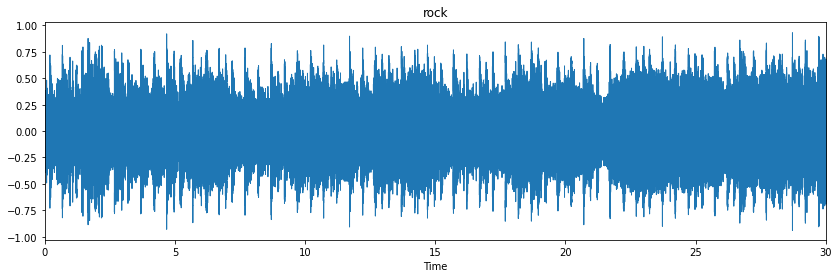

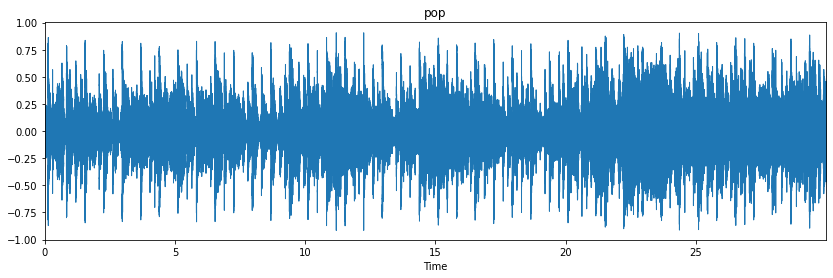

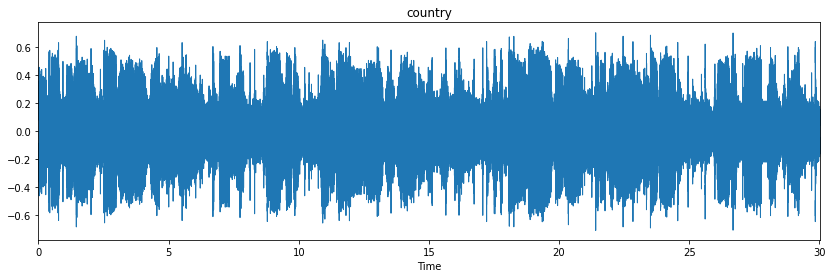

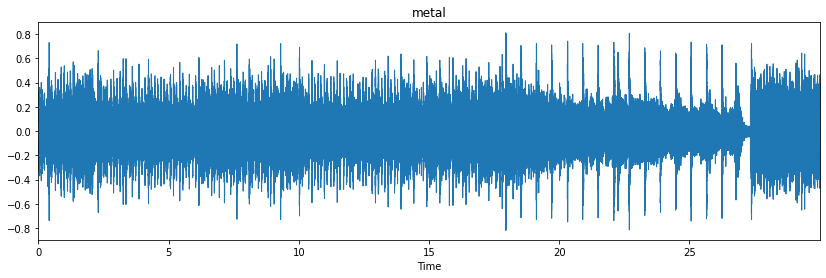

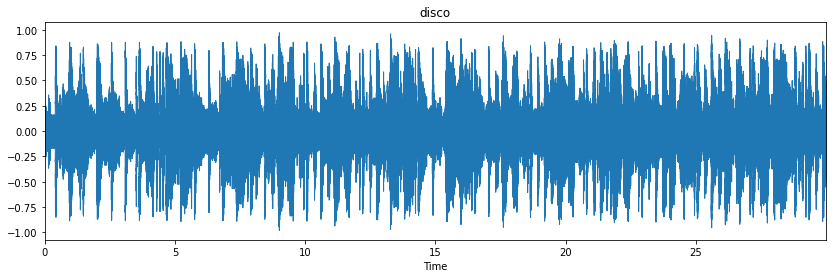

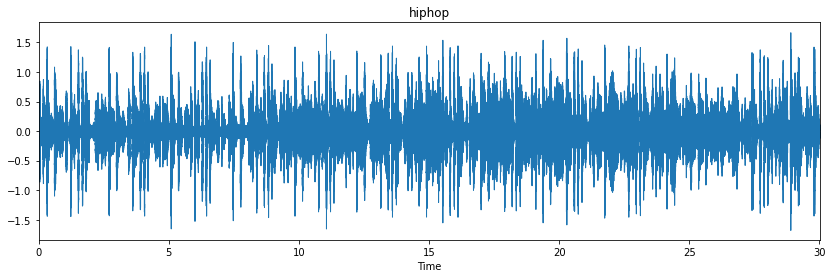

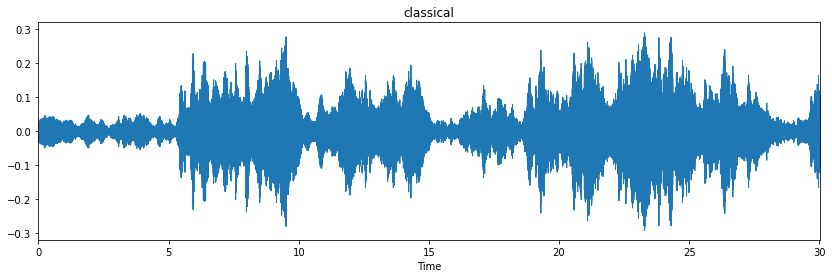

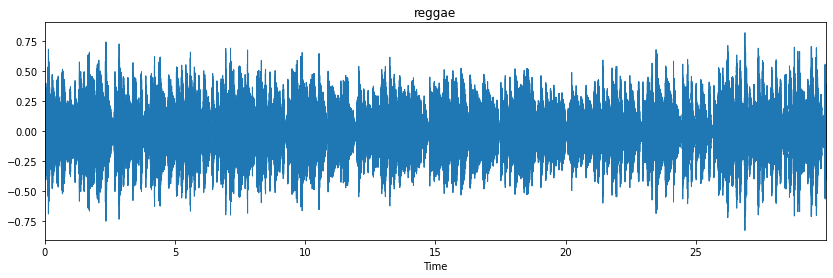

In [23]:
for i in range(len(SAMPLES)):
  plt.figure(figsize = (14, 4))
  librosa.display.waveplot(SAMPLES[i], sr = 16000)
  plt.title(data['mapping'][i])

### **Spectograms**

In [33]:
def get_spectogram(samples, cat):
  hop_length = 512
  sr = 16000
  D = librosa.amplitude_to_db(np.abs(librosa.stft(samples)), ref = np.max)
  plt.figure(figsize=(14, 8))
  librosa.display.specshow(D, y_axis = 'log', x_axis = 'time', sr = sr, hop_length=hop_length)
  plt.colorbar()
  plt.title(cat)

In [34]:
for i in range(len(SAMPLES)):
  get_spectogram(SAMPLES[i], data['mapping'][i])

Output hidden; open in https://colab.research.google.com to view.

#### now lets prepare our training and validation dataset

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(np.array(data['mfcc']), np.array(data['labels']), test_size = 0.2 ,random_state = 69)

In [37]:
print(x_train.shape)
print(y_train.shape)

(6399, 94, 13)
(6399,)


**MODEL BUILDING**

In [42]:
from keras.layers import Dense, LSTM, Input, Flatten, Dropout
from keras.models import Model, load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping

def get_model():
  inputs = Input(shape = (94, 13))
  x = LSTM(512, return_sequences = True)(inputs)
  x = Dropout(0.3)(x)

  x = LSTM(256)(x)
  x = Dropout(0.3)(x)

  x = Flatten()(x)
  x = Dense(256, activation = 'relu')(x)
  x = Dropout(0.3)(x)

  outputs = Dense(8, activation= 'softmax')(x)

  model = Model(inputs, outputs)
  model.summary()
  return model

In [43]:
model = get_model()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 94, 13)]          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 94, 512)           1077248   
_________________________________________________________________
dropout (Dropout)            (None, 94, 512)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               787456    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               65792 

In [44]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [46]:
es = EarlyStopping(monitor = 'val_accuracy', patience=10, verbose = 1,)
mc = ModelCheckpoint('/content/drive/MyDrive/kaggle/audio dataset/genre_classifier.h5', monitor = 'val_accuracy',)

In [47]:
hist = model.fit(x_train, y_train, epochs = 100, batch_size = 32, validation_data=(x_val, y_val), callbacks=[es, mc])

Epoch 1/100
200/200 [==============================] - 39s 27ms/step - loss: 1.5455 - accuracy: 0.4164 - val_loss: 1.1080 - val_accuracy: 0.5994
Epoch 2/100
200/200 [==============================] - 4s 22ms/step - loss: 1.1090 - accuracy: 0.5939 - val_loss: 0.9849 - val_accuracy: 0.6463
Epoch 3/100
200/200 [==============================] - 5s 23ms/step - loss: 0.9437 - accuracy: 0.6617 - val_loss: 0.8412 - val_accuracy: 0.6988
Epoch 4/100
200/200 [==============================] - 5s 23ms/step - loss: 0.8000 - accuracy: 0.7234 - val_loss: 0.8521 - val_accuracy: 0.6944
Epoch 5/100
200/200 [==============================] - 5s 23ms/step - loss: 0.7213 - accuracy: 0.7455 - val_loss: 0.8619 - val_accuracy: 0.7081
Epoch 6/100
200/200 [==============================] - 5s 23ms/step - loss: 0.6474 - accuracy: 0.7732 - val_loss: 0.7504 - val_accuracy: 0.7381
Epoch 7/100
200/200 [==============================] - 5s 23ms/step - loss: 0.5694 - accuracy: 0.8019 - val_loss: 0.7427 - val_accuracy

**Learning Curves**

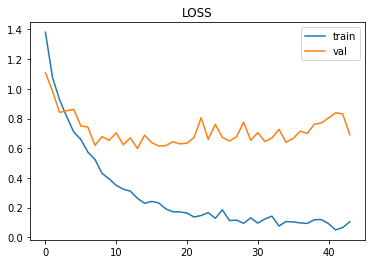

In [54]:
plt.plot(hist.history['loss'], label = 'train')
plt.plot(hist.history['val_loss'], label = 'val')
plt.title('LOSS')
plt.legend()

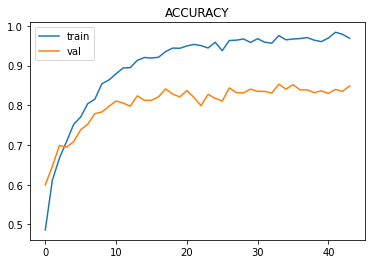

In [55]:
plt.plot(hist.history['accuracy'], label = 'train')
plt.plot(hist.history['val_accuracy'], label = 'val')
plt.title('ACCURACY')
plt.legend()

**Lets load our best model and start testing**

In [48]:
model = load_model('/content/drive/MyDrive/kaggle/audio dataset/genre_classifier.h5')

#### **Lets say we input audio path predict_audio function return the output on ensembling outputs of 3sec clips as expected by the model**

In [71]:
def predict_audio(audio_path):
  sr = 16000
  hop_length = 512
  n_fft = 2048
  num_mfcc = 13
  duration_clip = 3
  number_of_samples_per_clip =sr*duration_clip
  samples, sr = librosa.load(audio_path, sr = sr)
  ipd.display(ipd.Audio(samples, rate = sr))

  # as our model was trained we need 3 sec segments to predict so we will divide the song in 3 sec clips and take prediction on ensemble of every clips
  clips = []
  no_of_clips = len(samples)//number_of_samples_per_clip

  for i in range(no_of_clips):
    start = i*number_of_samples_per_clip
    end = start + number_of_samples_per_clip
    mfcc = librosa.feature.mfcc(samples[start : end], sr = sr, n_mfcc = num_mfcc, n_fft = n_fft, hop_length = hop_length)
    clips.append(mfcc.T)

  clips = np.array(clips)
  prob = model.predict(clips)
  pred = np.argmax(prob, axis = 1)
  pred = int(np.median(pred))

  return data['mapping'][pred]



In [61]:
predict_audio('/content/kaggle/Data/genres_original/hiphop/hiphop.00001.wav')

'hiphop'

#### **Lets say we are already given mfcc of shape (94, 13) so predict_mfcc will predict the output**

In [62]:
def predict_mfcc(mfcc):
  mfcc = mfcc.reshape(1, 94, 13)
  prob = model.predict(mfcc)
  pred = np.argmax(prob[0])
  
  return data['mapping'][pred]

In [63]:
predict_mfcc(x_val[100])

'reggae'

####Classification report and confusion matrix

In [65]:
pred_val = model.predict(x_val)
pred_val = np.argmax(pred_val, axis = 1)

In [66]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_val, pred_val))
print(classification_report(y_val, pred_val))

[[143   4  11  14  10   4   3   7]
 [  5 169   3   1   4  13   0   5]
 [ 15   4 171   1   9   3   0   7]
 [  9   0   2 168   6   9   0   1]
 [  8   6   2   2 163   5   0   3]
 [  8   4   1   8   3 161   0   8]
 [  2   1   3   0   0   0 201   0]
 [  8   2   6   0   7   5   0 182]]
              precision    recall  f1-score   support

           0       0.72      0.73      0.73       196
           1       0.89      0.84      0.87       200
           2       0.86      0.81      0.84       210
           3       0.87      0.86      0.86       195
           4       0.81      0.86      0.83       189
           5       0.81      0.83      0.82       193
           6       0.99      0.97      0.98       207
           7       0.85      0.87      0.86       210

    accuracy                           0.85      1600
   macro avg       0.85      0.85      0.85      1600
weighted avg       0.85      0.85      0.85      1600



In [67]:
data['mapping']

['rock', 'pop', 'country', 'metal', 'disco', 'hiphop', 'classical', 'reggae']

#### Now lets test one hiphop music dekh bete dekh and see the results it is 3 min song but our predict_audio is capable of preprocessing

In [72]:
predict_audio('/content/DEKH+BETE+DEKH+DAKAIT+X+SAMMOHIT+X+ANIKET+X+SLEDGE+OFFICIAL+MUSIC+VIDEO+AAVRUTTI+X+TEAM+EVO.wav')

Output hidden; open in https://colab.research.google.com to view.

more test

In [73]:
predict_audio('/content/Levan Polkka - Street Drummer.wav')

'hiphop'

In [74]:
predict_audio('/content/Bekhayali Instrumental Ringtone from Kabir Singh - AndroidMobileZone.wav')

'pop'

In [77]:
predict_audio('/content/Pictures of the Floating World - Bogong.wav') # country music

Output hidden; open in https://colab.research.google.com to view.